In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle

In [2]:
# Location of data
DATADIR = "EmotionDataset/Image"
CATEGORIES = ["Happy", "Neutral", "Sad"]

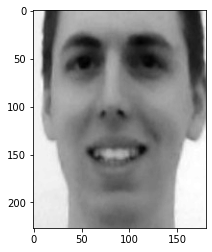

In [3]:
# Checking file path
for category in CATEGORIES:
    path = os.path.join(DATADIR, category) 
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [4]:
# Check shape
print(img_array.shape)

(227, 180)


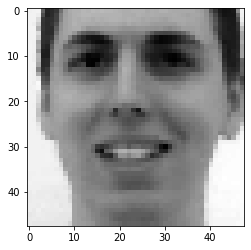

In [5]:
# Resizing
IMG_SIZE = 48

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

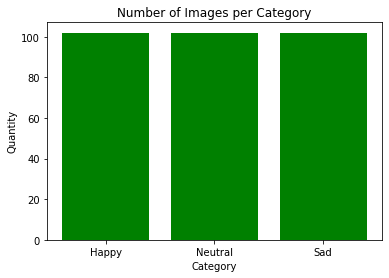

In [6]:
# data set
x = ['Happy', 'Neutral', 'Sad']
y = [len(os.listdir(os.path.join(DATADIR, x[0]))),
     len(os.listdir(os.path.join(DATADIR, x[1]))),
     len(os.listdir(os.path.join(DATADIR, x[2])))]

# plot stacked bar chart 
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.title('Number of Images per Category')
plt.bar(x, y, color='g')
plt.show()

In [7]:
# Proccessing data function
def create_training_data(direc, categories):
    temp_data = []                             # Temporary array
    for category in categories:             
        path = os.path.join(direc, category)   # Find file path
        class_num = CATEGORIES.index(category) # Determine image class happy, neutral or sad
        for img in os.listdir(path):           # Loop through images
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # Read in image as greyscale 
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))               # Resize image
                temp_data.append([new_array, class_num])                              # Append to temporary array
            except Exception as e:                                                    # Check for issue
                print('Image failed to process: ' + e)
    return temp_data                                                                  # Return processed data set
            
training_data = create_training_data(DATADIR, CATEGORIES)
print(len(training_data))                                                             

306


In [8]:
# Data example
print(training_data[:1])

[[array([[130, 131, 132, ...,  36,  85, 131],
       [131, 131, 129, ...,  35,  67, 130],
       [131, 131, 121, ...,  36,  57, 128],
       ...,
       [126, 127, 129, ..., 135, 133, 135],
       [127, 128, 127, ..., 133, 133, 134],
       [127, 126, 126, ..., 133, 134, 134]], dtype=uint8), 0]]
